In [1]:
import numpy as np  

import anndata

import cellpath as cp
import cellpath.visual as visual
import cellpath.benchmark as bmk 
import cellpath.de_analy as de

# CellPath

In [2]:
# example of constructing anndata for cellpath

# import pandas as pd
# import scanpy as sc
# from scipy.sparse import csr_matrix
# path = "./sim_data/Symsim/cycle_tree_rand1/"
# cell_labels = pd.read_csv(path + "cell_labels.txt", sep = "\t")
# cell_labels.head()
# cell_labels = cell_labels.rename({"true_time": "sim_time"}, axis = "columns")
# spliced_counts = pd.read_csv(path + "spliced_counts.txt", sep = "\t", header = None).values
# unspliced_counts = pd.read_csv(path + "unspliced_counts.txt", sep = "\t", header = None).values
# adata = anndata.AnnData(X = csr_matrix(spliced_counts.T), obs = cell_labels)
# adata.layers["spliced"] = csr_matrix(spliced_counts.T)
# adata.layers["unspliced"] = csr_matrix(unspliced_counts.T)
# sc.tl.umap(adata)

## CellPath step by step

In [6]:
num_trajs = 4
num_metacells = 300
resolution = 40

adata = anndata.read_h5ad("./sim_data/Symsim/cycle_tree_rand1.h5ad")

cellpath_obj = cp.CellPath(adata = adata, preprocess = True)

cellpath_obj.meta_cell_construction(flavor = "leiden", n_clusters = None, resolution = resolution, include_unspliced = True, standardize = True)
cellpath_obj.meta_cell_graph(k_neighs = 7, pruning = False)
# there are two modes, mode = "exact" provides exact solution, mode = "fast" is a faster implementation
cellpath_obj.meta_paths_finding(threshold = 0.5, cutoff_length = 5, length_bias = 0.5, mode = "exact")
cellpath_obj.first_order_pt(num_trajs = num_trajs, insertion = True, prop_insert = 0.000)

Meta-cell constructed, number of meta-cells: 307
Meta-cell level neighborhood graph constructed
cut off small paths and conduct quality control
selected path (starting_ending):
start_end:  34_226 , len:  52 newly covered: 52
start_end:  134_288 , len:  44 newly covered: 20
start_end:  125_235 , len:  47 newly covered: 13
start_end:  100_3 , len:  47 newly covered: 9
start_end:  127_303 , len:  46 newly covered: 7
start_end:  129_225 , len:  48 newly covered: 4
start_end:  131_233 , len:  46 newly covered: 5
start_end:  132_263 , len:  51 newly covered: 2
start_end:  34_269 , len:  52 newly covered: 1
start_end:  34_271 , len:  50 newly covered: 2
start_end:  34_120 , len:  49 newly covered: 2
start_end:  34_161 , len:  49 newly covered: 2
start_end:  34_219 , len:  49 newly covered: 2
start_end:  34_265 , len:  51 newly covered: 1
start_end:  34_266 , len:  51 newly covered: 1
start_end:  34_270 , len:  51 newly covered: 1
start_end:  34_175 , len:  48 newly covered: 2
Finished
number 

## All in one CellPath

In [14]:
# read in simulated dataset
num_trajs = 4
num_metacells = 300

adata = anndata.read_h5ad("./sim_data/Symsim/cycle_tree_rand1.h5ad")

cellpath_obj = cp.CellPath(adata = adata, preprocess = True)
# here we use fast implementation, the flavor can also be changed to "k-means" for k-means clustering
cellpath_obj.all_in_one(flavor = "leiden", num_metacells = num_metacells, resolution = 40, n_neighs = 7, num_trajs = num_trajs, insertion = True, prop_insert = 0.000, seed = 0, mode = "fast")

Meta-cell constructed, number of meta-cells: 307
Meta-cell level neighborhood graph constructed
cut off small paths and conduct quality control
selected path (starting_ending):
start_end:  34_226 , len:  52 newly covered: 52
start_end:  134_289 , len:  44 newly covered: 20
start_end:  125_235 , len:  47 newly covered: 13
start_end:  34_3 , len:  48 newly covered: 8
start_end:  34_303 , len:  47 newly covered: 6
start_end:  34_263 , len:  52 newly covered: 1
start_end:  34_269 , len:  52 newly covered: 1
start_end:  34_225 , len:  49 newly covered: 3
start_end:  34_271 , len:  50 newly covered: 2
start_end:  34_233 , len:  47 newly covered: 4
start_end:  34_265 , len:  51 newly covered: 1
start_end:  34_266 , len:  51 newly covered: 1
start_end:  34_270 , len:  51 newly covered: 1
Finished
number of cells: 0
Cell-level pseudo-time inferred


In [7]:
# pseudo-time assignment result
cellpath_obj.pseudo_order

,traj_0,traj_1,traj_2,traj_3
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
cell_631,NaN,NaN,NaN,88.0
cell_630,NaN,NaN,NaN,89.0
cell_647,NaN,NaN,NaN,90.0
cell_656,NaN,NaN,NaN,91.0


## Visualization

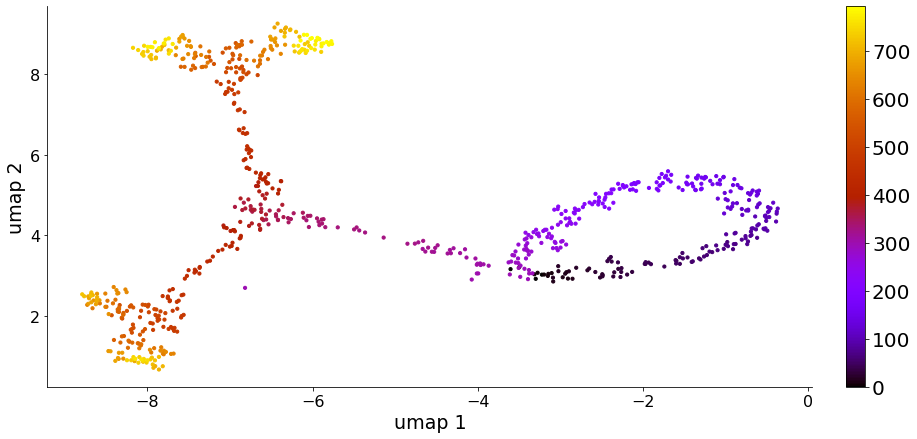

In [4]:
visual.plot_data(cellpath_obj, basis = "umap", figsize = (15,7), axis = True)

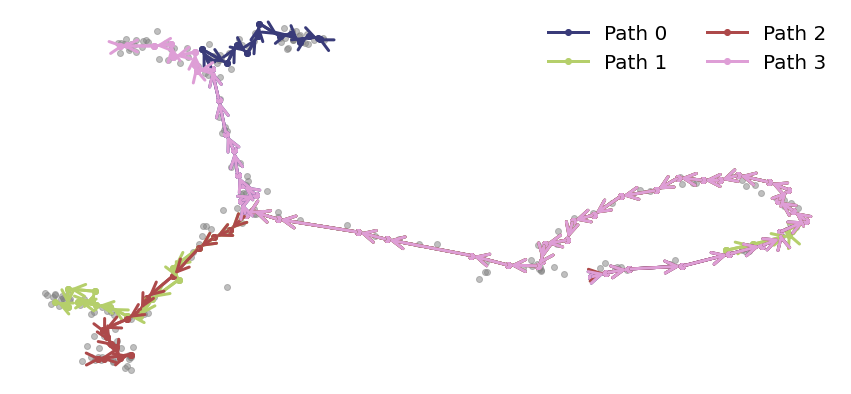

In [15]:
visual.meta_traj_visual(cellpath_obj, basis="umap", figsize = (15,7), trajs = num_trajs)

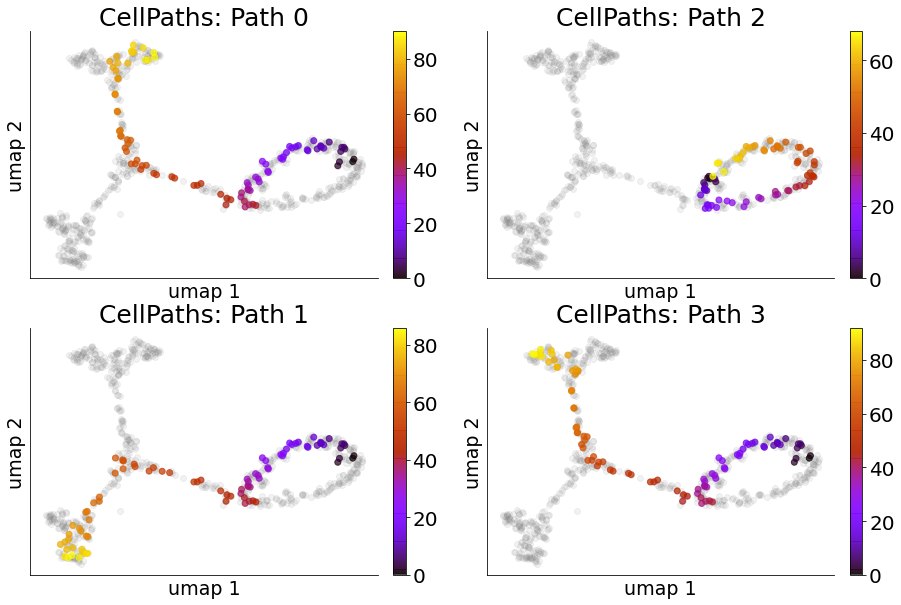

In [9]:
visual.first_order_approx_pt(cellpath_obj, basis="umap", trajs = num_trajs, figsize=(15,10), save_as= None)

## Benchmark
* **Differentially expressed genes**: Gene is annotated as index since the dataset is simulated data. 

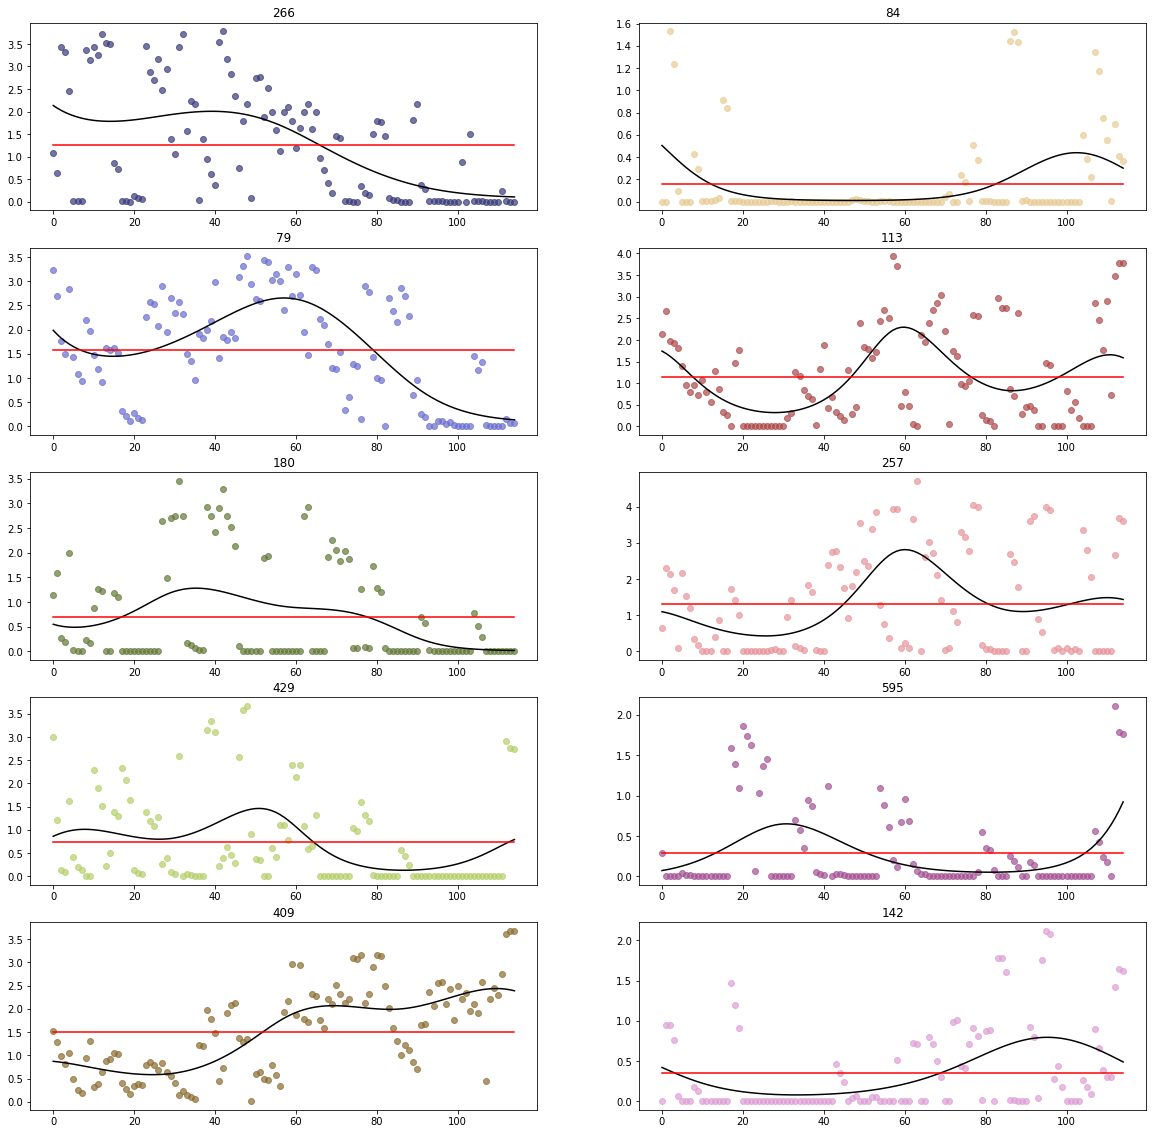

In [10]:
de_genes = de.de_analy(cellpath_obj, p_val_t = 0.05, verbose = False)
de.de_plot(cellpath_obj, {"traj_0": de_genes["traj_0"]}, figsize = (20,20), n_genes = 10, save_path = None)